In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [81]:
#carregando dados
#Na i246 os sensores estão invertidos, logo outside = inside e inside = outside
data = pd.read_csv('C:\Users\giron\Desktop\work\data_ultrassonic_sensor\data_zoiudo\h317_29_01_25\h317_freq0.01.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   533 non-null    int64 
 1   distance_cm_inside   533 non-null    int64 
 2   distance_cm_outside  533 non-null    int64 
 3   device_code          533 non-null    object
 4   measured_at          533 non-null    object
 5   errors               533 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 25.1+ KB
None


# Iniciando

In [82]:
data

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors
0,130865974,104,196,F0:08:D1:D0:7B:84,2025-01-27 18:25:45,0
1,130865973,104,196,F0:08:D1:D0:7B:84,2025-01-27 18:25:45,0
2,130865972,199,196,F0:08:D1:D0:7B:84,2025-01-27 18:25:45,0
3,130865971,197,198,F0:08:D1:D0:7B:84,2025-01-27 18:25:45,0
4,130865970,197,197,F0:08:D1:D0:7B:84,2025-01-27 18:25:45,0
...,...,...,...,...,...,...
528,130865448,196,198,F0:08:D1:D0:7B:84,2025-01-27 18:24:33,0
529,130865445,196,197,F0:08:D1:D0:7B:84,2025-01-27 18:24:33,0
530,130865447,197,198,F0:08:D1:D0:7B:84,2025-01-27 18:24:33,0
531,130865446,197,196,F0:08:D1:D0:7B:84,2025-01-27 18:24:33,0


In [83]:
data['measured_at'] = pd.to_datetime(data['measured_at'], errors='coerce')
data['measured_at'] = data['measured_at'].dt.strftime("%M:%S")
data

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors
0,130865974,104,196,F0:08:D1:D0:7B:84,25:45,0
1,130865973,104,196,F0:08:D1:D0:7B:84,25:45,0
2,130865972,199,196,F0:08:D1:D0:7B:84,25:45,0
3,130865971,197,198,F0:08:D1:D0:7B:84,25:45,0
4,130865970,197,197,F0:08:D1:D0:7B:84,25:45,0
...,...,...,...,...,...,...
528,130865448,196,198,F0:08:D1:D0:7B:84,24:33,0
529,130865445,196,197,F0:08:D1:D0:7B:84,24:33,0
530,130865447,197,198,F0:08:D1:D0:7B:84,24:33,0
531,130865446,197,196,F0:08:D1:D0:7B:84,24:33,0


In [84]:
#Reograniza os índices
data['id'] = data.index + 1
data

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors
0,1,104,196,F0:08:D1:D0:7B:84,25:45,0
1,2,104,196,F0:08:D1:D0:7B:84,25:45,0
2,3,199,196,F0:08:D1:D0:7B:84,25:45,0
3,4,197,198,F0:08:D1:D0:7B:84,25:45,0
4,5,197,197,F0:08:D1:D0:7B:84,25:45,0
...,...,...,...,...,...,...
528,529,196,198,F0:08:D1:D0:7B:84,24:33,0
529,530,196,197,F0:08:D1:D0:7B:84,24:33,0
530,531,197,198,F0:08:D1:D0:7B:84,24:33,0
531,532,197,196,F0:08:D1:D0:7B:84,24:33,0


Este plot apresenta a distribuição das leituras, pode-se ver uma incidência dos pontos através do quão opaco o ponto é plotado, tendo em vista que a opacidade de apenas um ponto é de 0.5. Logo utiliza-se este gráfico para melhor visualizar as medidas capturadas pelo sensor e seu comportamento.

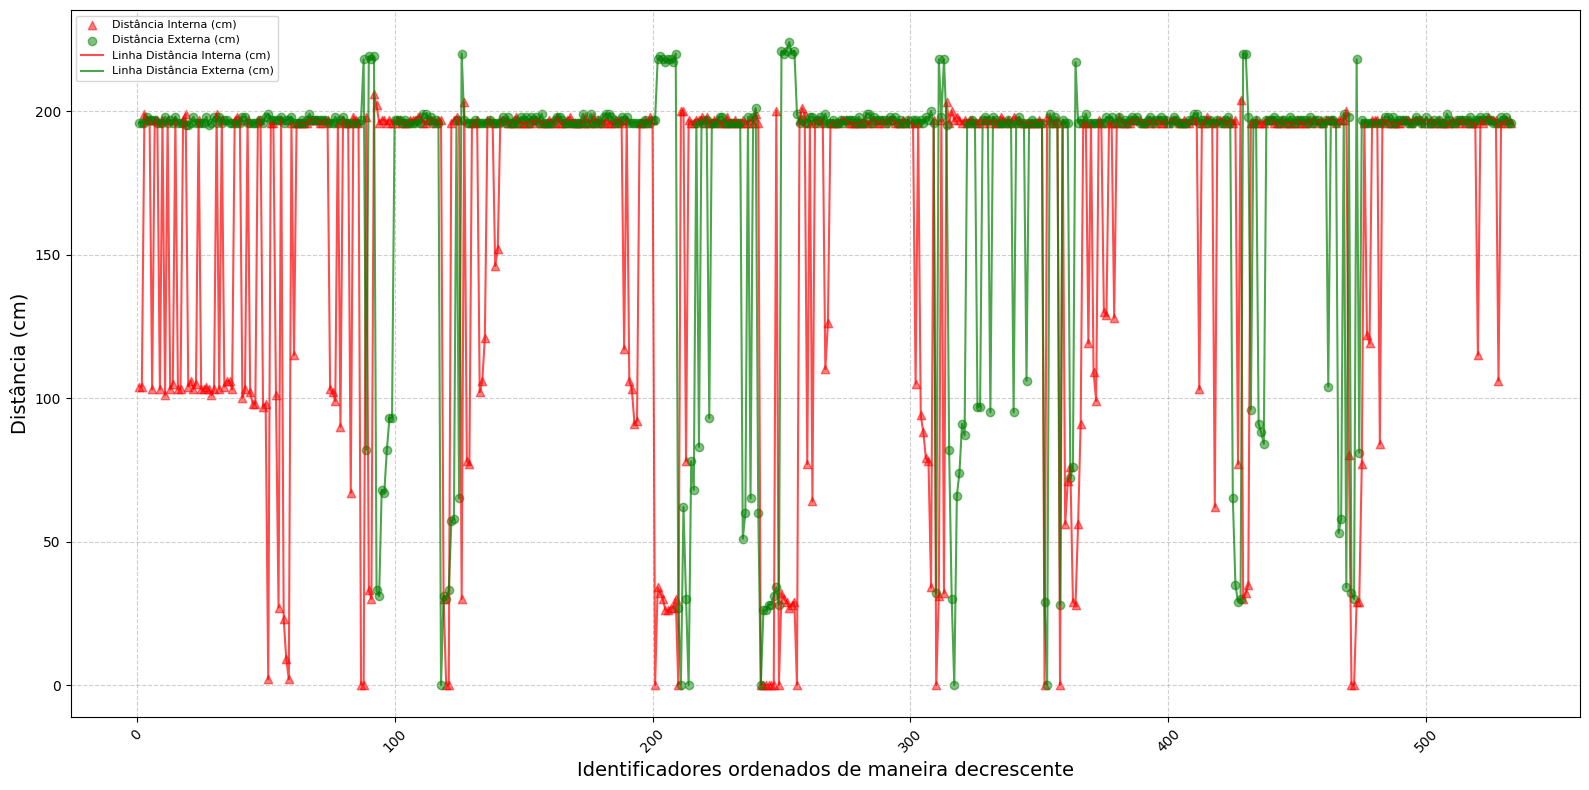

In [85]:
import matplotlib.pyplot as plt

# Configurar o tamanho do gráfico
plt.figure(figsize=(16, 8))

# Adicionar os scatter plots com transparência para evitar sobreposição
plt.scatter(data['id'], data['distance_cm_inside'], label='Distância Interna (cm)', alpha=0.5, marker='^', c='red')
plt.scatter(data['id'], data['distance_cm_outside'], label='Distância Externa (cm)', alpha=0.5, c='green')

plt.plot(data['id'], data['distance_cm_inside'], linestyle='-', color='red', alpha=0.7, label='Linha Distância Interna (cm)')
plt.plot(data['id'], data['distance_cm_outside'], linestyle='-', color='green', alpha=0.7, label='Linha Distância Externa (cm)')

# Adicionar título e legendas
#plt.title('Distâncias Interna e Externa por ID (SALA I-246)', fontsize=16)
plt.xlabel('Identificadores ordenados de maneira decrescente', fontsize=14)
plt.ylabel('Distância (cm)', fontsize=14)
plt.legend(loc='upper left', fontsize=8)

# Adicionar grid para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar os rótulos do eixo X para evitar sobrecarga visual
plt.xticks(rotation=45, fontsize=10)  # Mostra um rótulo a cada 10 IDs

# Melhorar o layout geral
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Binarização

In [86]:
bin_data = data
bin_data

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors
0,1,104,196,F0:08:D1:D0:7B:84,25:45,0
1,2,104,196,F0:08:D1:D0:7B:84,25:45,0
2,3,199,196,F0:08:D1:D0:7B:84,25:45,0
3,4,197,198,F0:08:D1:D0:7B:84,25:45,0
4,5,197,197,F0:08:D1:D0:7B:84,25:45,0
...,...,...,...,...,...,...
528,529,196,198,F0:08:D1:D0:7B:84,24:33,0
529,530,196,197,F0:08:D1:D0:7B:84,24:33,0
530,531,197,198,F0:08:D1:D0:7B:84,24:33,0
531,532,197,196,F0:08:D1:D0:7B:84,24:33,0


In [87]:
#O que é zero é erro;
#Realmente é?
#Não é erro! Deveria, mas não é!
#bin_data = bin_data[(bin_data['distance_cm_inside'] != 0) & (bin_data['distance_cm_outside'] != 0)]
#bin_data

In [88]:
#Binarizando
bin_data['state_inside_sensor'] = bin_data['distance_cm_inside'].apply(lambda x: 1 if x <= 60 else 0)
bin_data['state_outside_sensor'] = bin_data['distance_cm_outside'].apply(lambda x: 1 if x <= 60 else 0)
bin_data

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors,state_inside_sensor,state_outside_sensor
0,1,104,196,F0:08:D1:D0:7B:84,25:45,0,0,0
1,2,104,196,F0:08:D1:D0:7B:84,25:45,0,0,0
2,3,199,196,F0:08:D1:D0:7B:84,25:45,0,0,0
3,4,197,198,F0:08:D1:D0:7B:84,25:45,0,0,0
4,5,197,197,F0:08:D1:D0:7B:84,25:45,0,0,0
...,...,...,...,...,...,...,...,...
528,529,196,198,F0:08:D1:D0:7B:84,24:33,0,0,0
529,530,196,197,F0:08:D1:D0:7B:84,24:33,0,0,0
530,531,197,198,F0:08:D1:D0:7B:84,24:33,0,0,0
531,532,197,196,F0:08:D1:D0:7B:84,24:33,0,0,0


In [89]:
def determine_state(row):
    #sem excitação
    if row['state_inside_sensor'] == 0 and row['state_outside_sensor'] == 0:
        return 0
    #tem algo na saída
    elif row['state_inside_sensor'] == 0 and row['state_outside_sensor'] == 1:
        return 1
    #tem algo na entrada
    elif row['state_inside_sensor'] == 1 and row['state_outside_sensor'] == 0:
        return 2
    #os dois estão ativados
    elif row['state_inside_sensor'] == 1 and row['state_outside_sensor'] == 1:
        return 3

bin_data['state'] = bin_data.apply(determine_state, axis=1)
bin_data

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors,state_inside_sensor,state_outside_sensor,state
0,1,104,196,F0:08:D1:D0:7B:84,25:45,0,0,0,0
1,2,104,196,F0:08:D1:D0:7B:84,25:45,0,0,0,0
2,3,199,196,F0:08:D1:D0:7B:84,25:45,0,0,0,0
3,4,197,198,F0:08:D1:D0:7B:84,25:45,0,0,0,0
4,5,197,197,F0:08:D1:D0:7B:84,25:45,0,0,0,0
...,...,...,...,...,...,...,...,...,...
528,529,196,198,F0:08:D1:D0:7B:84,24:33,0,0,0,0
529,530,196,197,F0:08:D1:D0:7B:84,24:33,0,0,0,0
530,531,197,198,F0:08:D1:D0:7B:84,24:33,0,0,0,0
531,532,197,196,F0:08:D1:D0:7B:84,24:33,0,0,0,0


In [90]:
print(bin_data['state'].value_counts().sort_index())

state
0    458
1     21
2     38
3     16
Name: count, dtype: int64


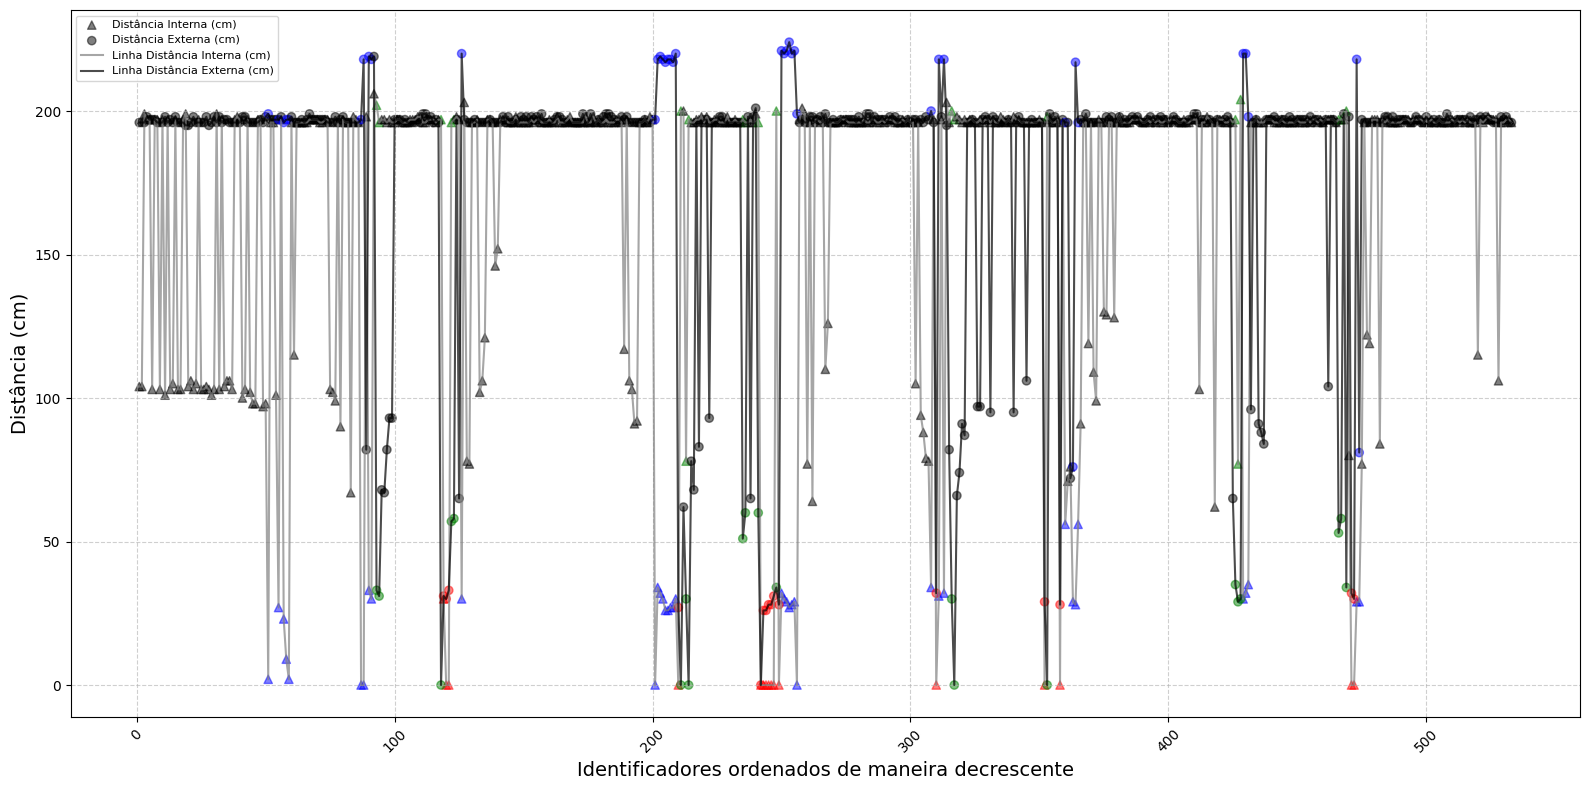

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'data' seja um DataFrame do pandas
# Exemplo de mapeamento de cores baseado no valor de 'state'
color_map = {
    0: 'black',  # state = 0 -> preto
    3: 'red',    # state = 3 -> vermelho
    2: 'blue',   # state = 2 -> azul
    1: 'green'  # state = 1 -> verde
}

# Criar uma lista de cores baseada na coluna 'state'
colors_inside = [color_map[state] for state in data['state']]
colors_outside = [color_map[state] for state in data['state']]

# Configurar o tamanho do gráfico
plt.figure(figsize=(16, 8))

# Adicionar os scatter plots com cores condicionais
plt.scatter(data['id'], data['distance_cm_inside'], label='Distância Interna (cm)', alpha=0.5, marker='^', c=colors_inside)
plt.scatter(data['id'], data['distance_cm_outside'], label='Distância Externa (cm)', alpha=0.5, c=colors_outside)

# Adicionar as linhas de conexão
plt.plot(data['id'], data['distance_cm_inside'], linestyle='-', color='gray', alpha=0.7, label='Linha Distância Interna (cm)')
plt.plot(data['id'], data['distance_cm_outside'], linestyle='-', color='black', alpha=0.7, label='Linha Distância Externa (cm)')

# Adicionar título e legendas
plt.xlabel('Identificadores ordenados de maneira decrescente', fontsize=14)
plt.ylabel('Distância (cm)', fontsize=14)
plt.legend(loc='upper left', fontsize=8)

# Adicionar grid para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar os rótulos do eixo X para evitar sobrecarga visual
plt.xticks(rotation=45, fontsize=10)  # Mostra um rótulo a cada 10 IDs

# Melhorar o layout geral
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [92]:
#Função parece ruim!
#Seria bom analisar mais afundo e conseguir enchergar os state 3.
#Armazeno os índices de todos os eventos que possues state = 3
state_3_indices = bin_data[bin_data['state'] == 3].index

def get_sub_dataframe(data, index, window=25):
    start_idx = max(0, index - window)
    end_idx = min(len(data), index + window + 1)  # +1 para incluir o índice atual
    return data.iloc[start_idx:end_idx]

# Dicionário para armazenar os sub-DataFrames
sub_dataframes = {}

# Criar sub-DataFrames para cada índice onde state = 3
for i in range(1, len(state_3_indices)):
    #armazena o índice atual que possue state = 3
    current_idx = state_3_indices[i]
    #armazena current_idx - 1
    previous_idx = state_3_indices[i - 1]
    #não pegar os mesmos ranges
    if current_idx > previous_idx + 25:
        print(current_idx)
        # Aqui você pode adicionar o que deseja fazer quando a condição for verdadeira
        sub_dataframes[f'sub_df_{current_idx}'] = get_sub_dataframe(bin_data, current_idx, window=25)


209
241
309
351
470


In [93]:
# Função para criar sub-DataFrames com base em um índice e uma janela
def get_sub_dataframe(data, index, window=25):
    start_idx = max(0, index - window)
    end_idx = min(len(data), index + window + 1)  # +1 para incluir o índice atual
    return data.iloc[start_idx:end_idx]

# Armazenar os índices de todos os eventos onde state != 0
non_zero_state_indices = bin_data[bin_data['state'] != 0].index

# Dicionário para armazenar os sub-DataFrames
sub_dataframes_1 = {}

# Criar sub-DataFrames para cada índice onde state != 0
for i, current_idx in enumerate(non_zero_state_indices):
    # Verificar se o índice atual não está muito próximo do anterior
    if i == 0 or current_idx > non_zero_state_indices[i - 1] + 25:
        print(f"Criando sub-DataFrame para o índice {current_idx}")
        sub_dataframes_1[f'sub_df_{current_idx}'] = get_sub_dataframe(bin_data, current_idx, window=25)

# Exibir os sub-DataFrames criados
for key, sub_df in sub_dataframes_1.items():
    print(f"\n{key}:\n{sub_df}")

Criando sub-DataFrame para o índice 50
Criando sub-DataFrame para o índice 86
Criando sub-DataFrame para o índice 200
Criando sub-DataFrame para o índice 307
Criando sub-DataFrame para o índice 351
Criando sub-DataFrame para o índice 425
Criando sub-DataFrame para o índice 465

sub_df_50:
    id  distance_cm_inside  distance_cm_outside        device_code  \
25  26                 103                  196  F0:08:D1:D0:7B:84   
26  27                 104                  198  F0:08:D1:D0:7B:84   
27  28                 103                  195  F0:08:D1:D0:7B:84   
28  29                 101                  196  F0:08:D1:D0:7B:84   
29  30                 103                  198  F0:08:D1:D0:7B:84   
30  31                 199                  196  F0:08:D1:D0:7B:84   
31  32                 103                  198  F0:08:D1:D0:7B:84   
32  33                 197                  196  F0:08:D1:D0:7B:84   
33  34                 104                  197  F0:08:D1:D0:7B:84   
34  35    

In [94]:
print(state_3_indices)

Index([118, 119, 120, 209, 241, 242, 243, 244, 245, 246, 248, 309, 351, 357,
       470, 471],
      dtype='int64')


7


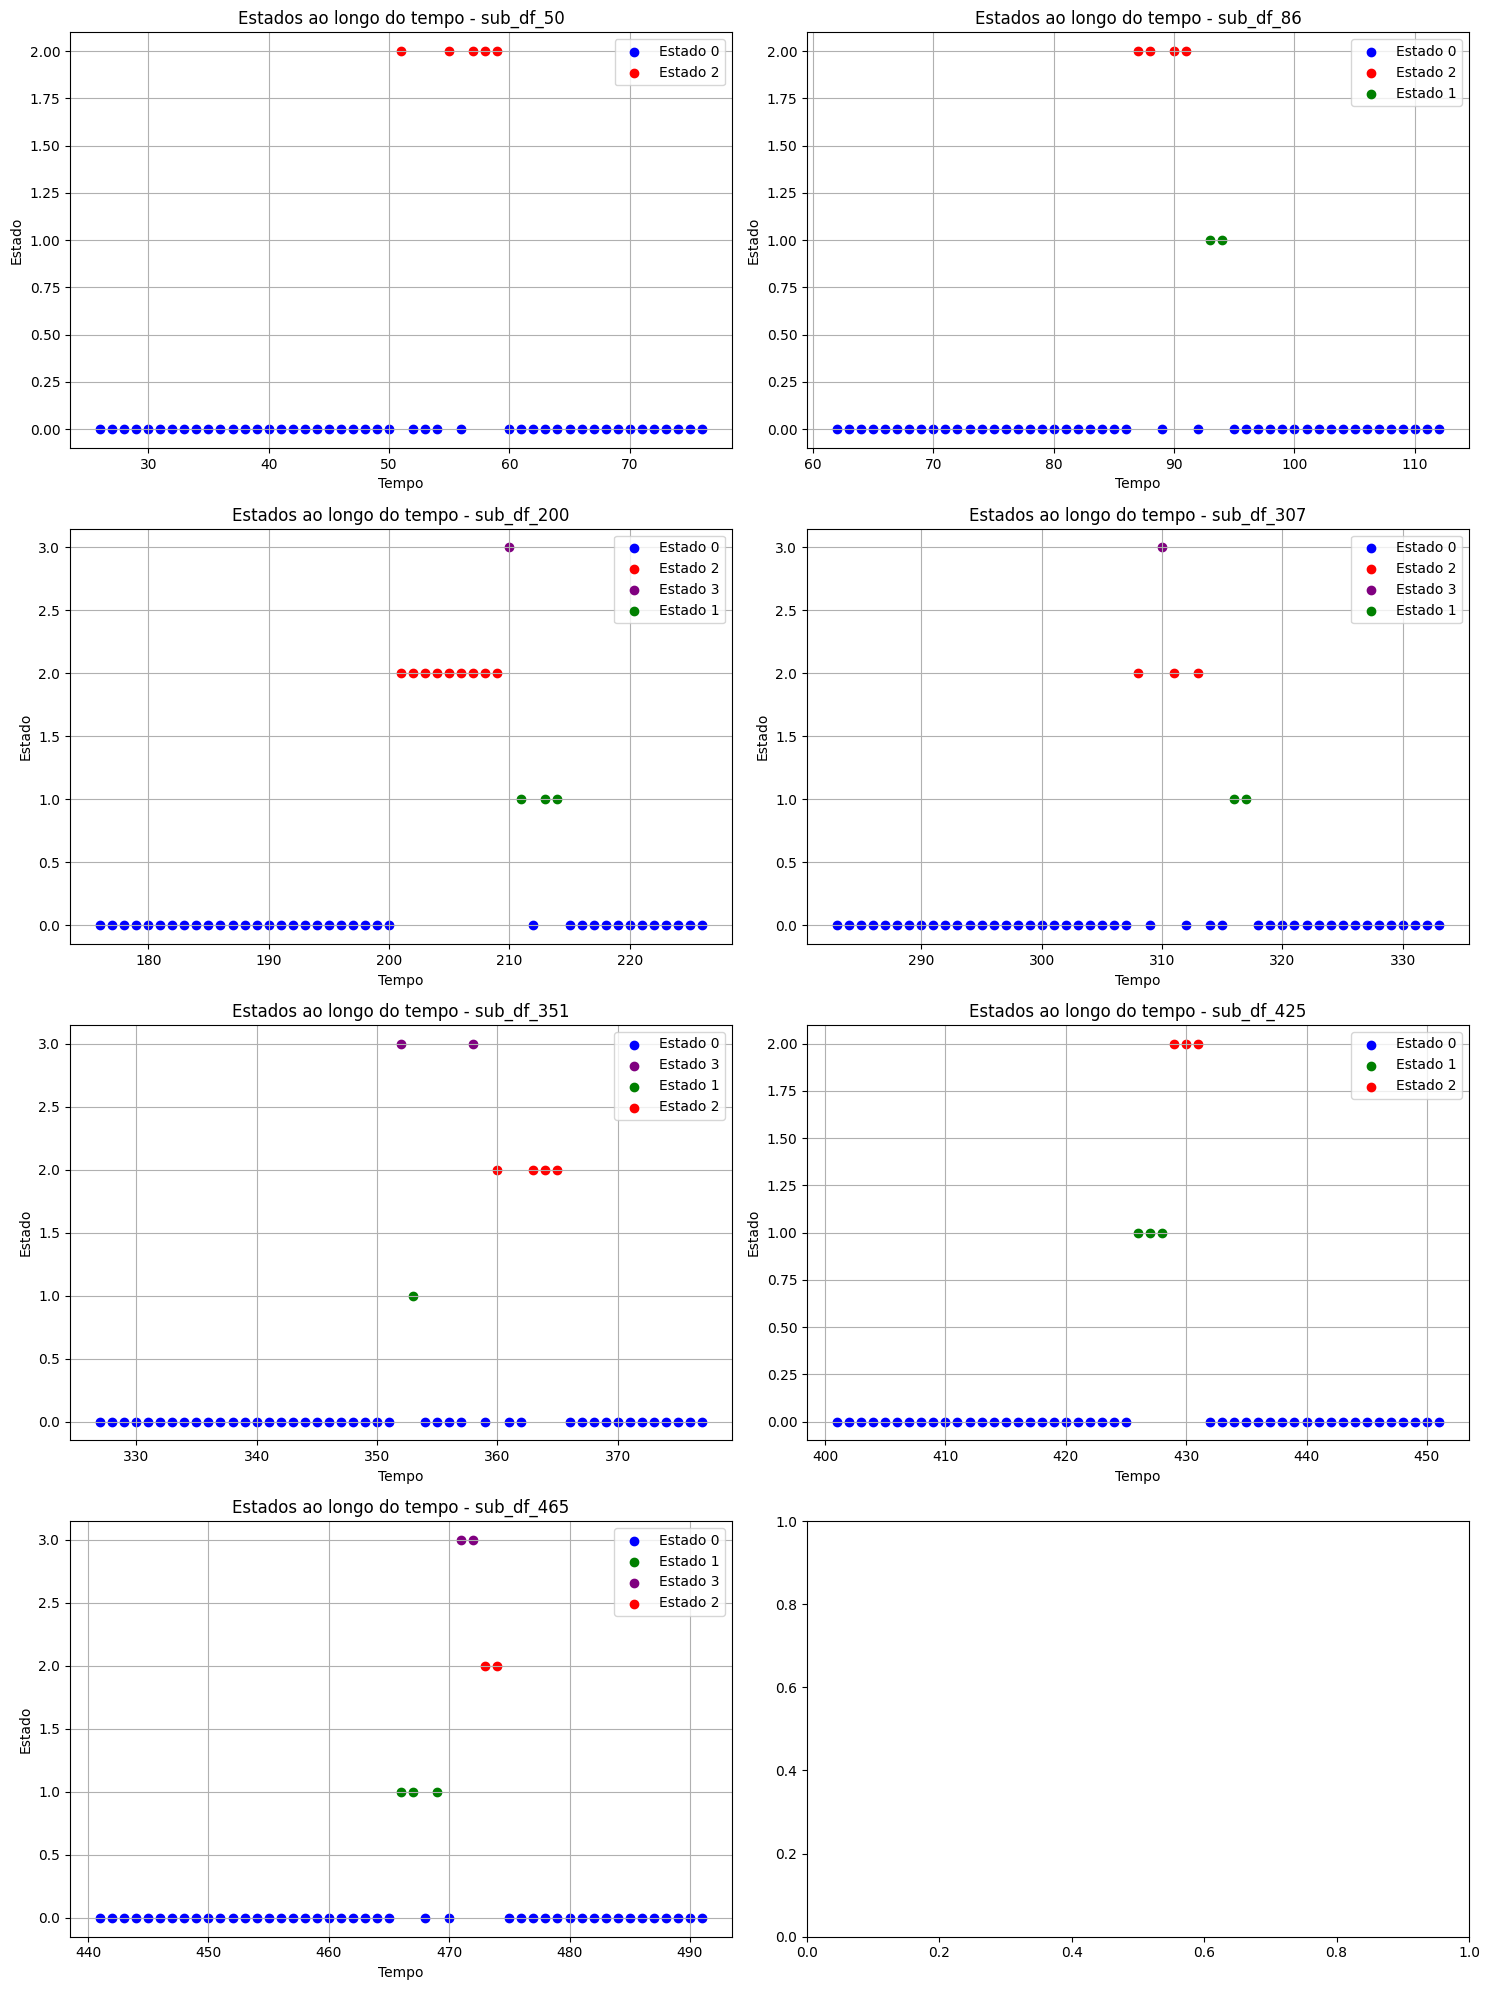

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Configuração do mapa de cores
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}

# Quantidade de DataFrames
num_dfs = len(sub_dataframes_1)
print(len(sub_dataframes_1))
cols = 2  # Número de colunas na grade de subplots
rows = (num_dfs + cols - 1) // cols  # Número de linhas calculadas para acomodar todos os DataFrames

# Criando uma figura grande para acomodar todos os subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axs = axs.flatten()  # Transforma a matriz de axs em um array linear para facilitar o acesso

# Iterando sobre cada subframe dentro do dicionário de dataframes
for idx, (key, df) in enumerate(sub_dataframes_1.items()):
    # Convertendo a coluna 'measured_at' para datetime

    # Plotando dados para cada estado único no subplot correspondente
    for state in df['state'].unique():
        subset = df[df['state'] == state]
        axs[idx].scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

    # Formatando o eixo X para mostrar datas
    #axs[idx].xaxis.set_major_formatter(DateFormatter('%M:%S'))
    #axs[idx].figure.autofmt_xdate()  # Auto-formata as datas para evitar sobreposição

    # Adicionando título e legendas
    axs[idx].set_title(f'Estados ao longo do tempo - {key}')
    axs[idx].set_xlabel('Tempo')
    axs[idx].set_ylabel('Estado')
    axs[idx].legend()
    axs[idx].grid(True)

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()


In [96]:
#Estado da linha anterior
#Máquina de estados
  #0 = sem excitação
  #1 = entrando
  #2 = saindo
#Percorrendo dicionário de eventos:
count = 0
for key, df in sub_dataframes_1.items():
  print(key)
  previous_state = 0
  state_machine = 0
  # Convertendo a coluna 'measured_at' para datetime
  #df['measured_at'] = pd.to_datetime(df['measured_at'])
  #Percorrendo cada linha de cada evento
  for index, row in df.iterrows():
    #print(row['state'], state_machine)
    #Condição para iniciar a máquina de estados
    if(row['state'] == 3 and state_machine == 0):
      print("Evento de interesse:")
      if(previous_state == 1):
        print("Alguém está entrando...", end=" ")
        state_machine = 1
      if(previous_state == 2):
        print("Alguém está saindo...", end=" ")
        state_machine = 2
    else:
    #Condição redundante para os dois estados(3,3)
    #Não precisa existir
    #if(previous_state == 3 and row['state'] == 3):
      #print("Alguém continua tentando entrar/sair...", end=" ")
      #state_machine = state_machine
    #Possíveis caminhos para o estado de entrada
      if(state_machine == 1):
        if(previous_state == 2 and row['state'] == 0):
          print("Alguém entrou")
          count =+ 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 1):
          print("A pessoa desistiu de entrar")
          state_machine = 0
        else:
          print("Alguém continua tentando entrar...", end=" ")
        #A máquina de estados nao varia
      #Possíveis caminhos para o estado de saída
      if(state_machine == 2):
        if(previous_state == 1 and row['state'] == 0):
          print("Alguém saiu")
          count =- 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 2):
          print("A pessoa desistiu de sair")
          state_machine = 0
        else:
          print("Alguém continua tentando sair...", end=" ")
        #A máquina de estados nao varia
    previous_state = row['state']
  print("")
print("Quantidade de pessoas:", end=" ")
print(count)



sub_df_50

sub_df_86

sub_df_200
Evento de interesse:
Alguém está saindo... Alguém continua tentando sair... Alguém saiu

sub_df_307
Evento de interesse:

sub_df_351
Evento de interesse:
Evento de interesse:

sub_df_425

sub_df_465
Evento de interesse:
Evento de interesse:

Quantidade de pessoas: -1


7


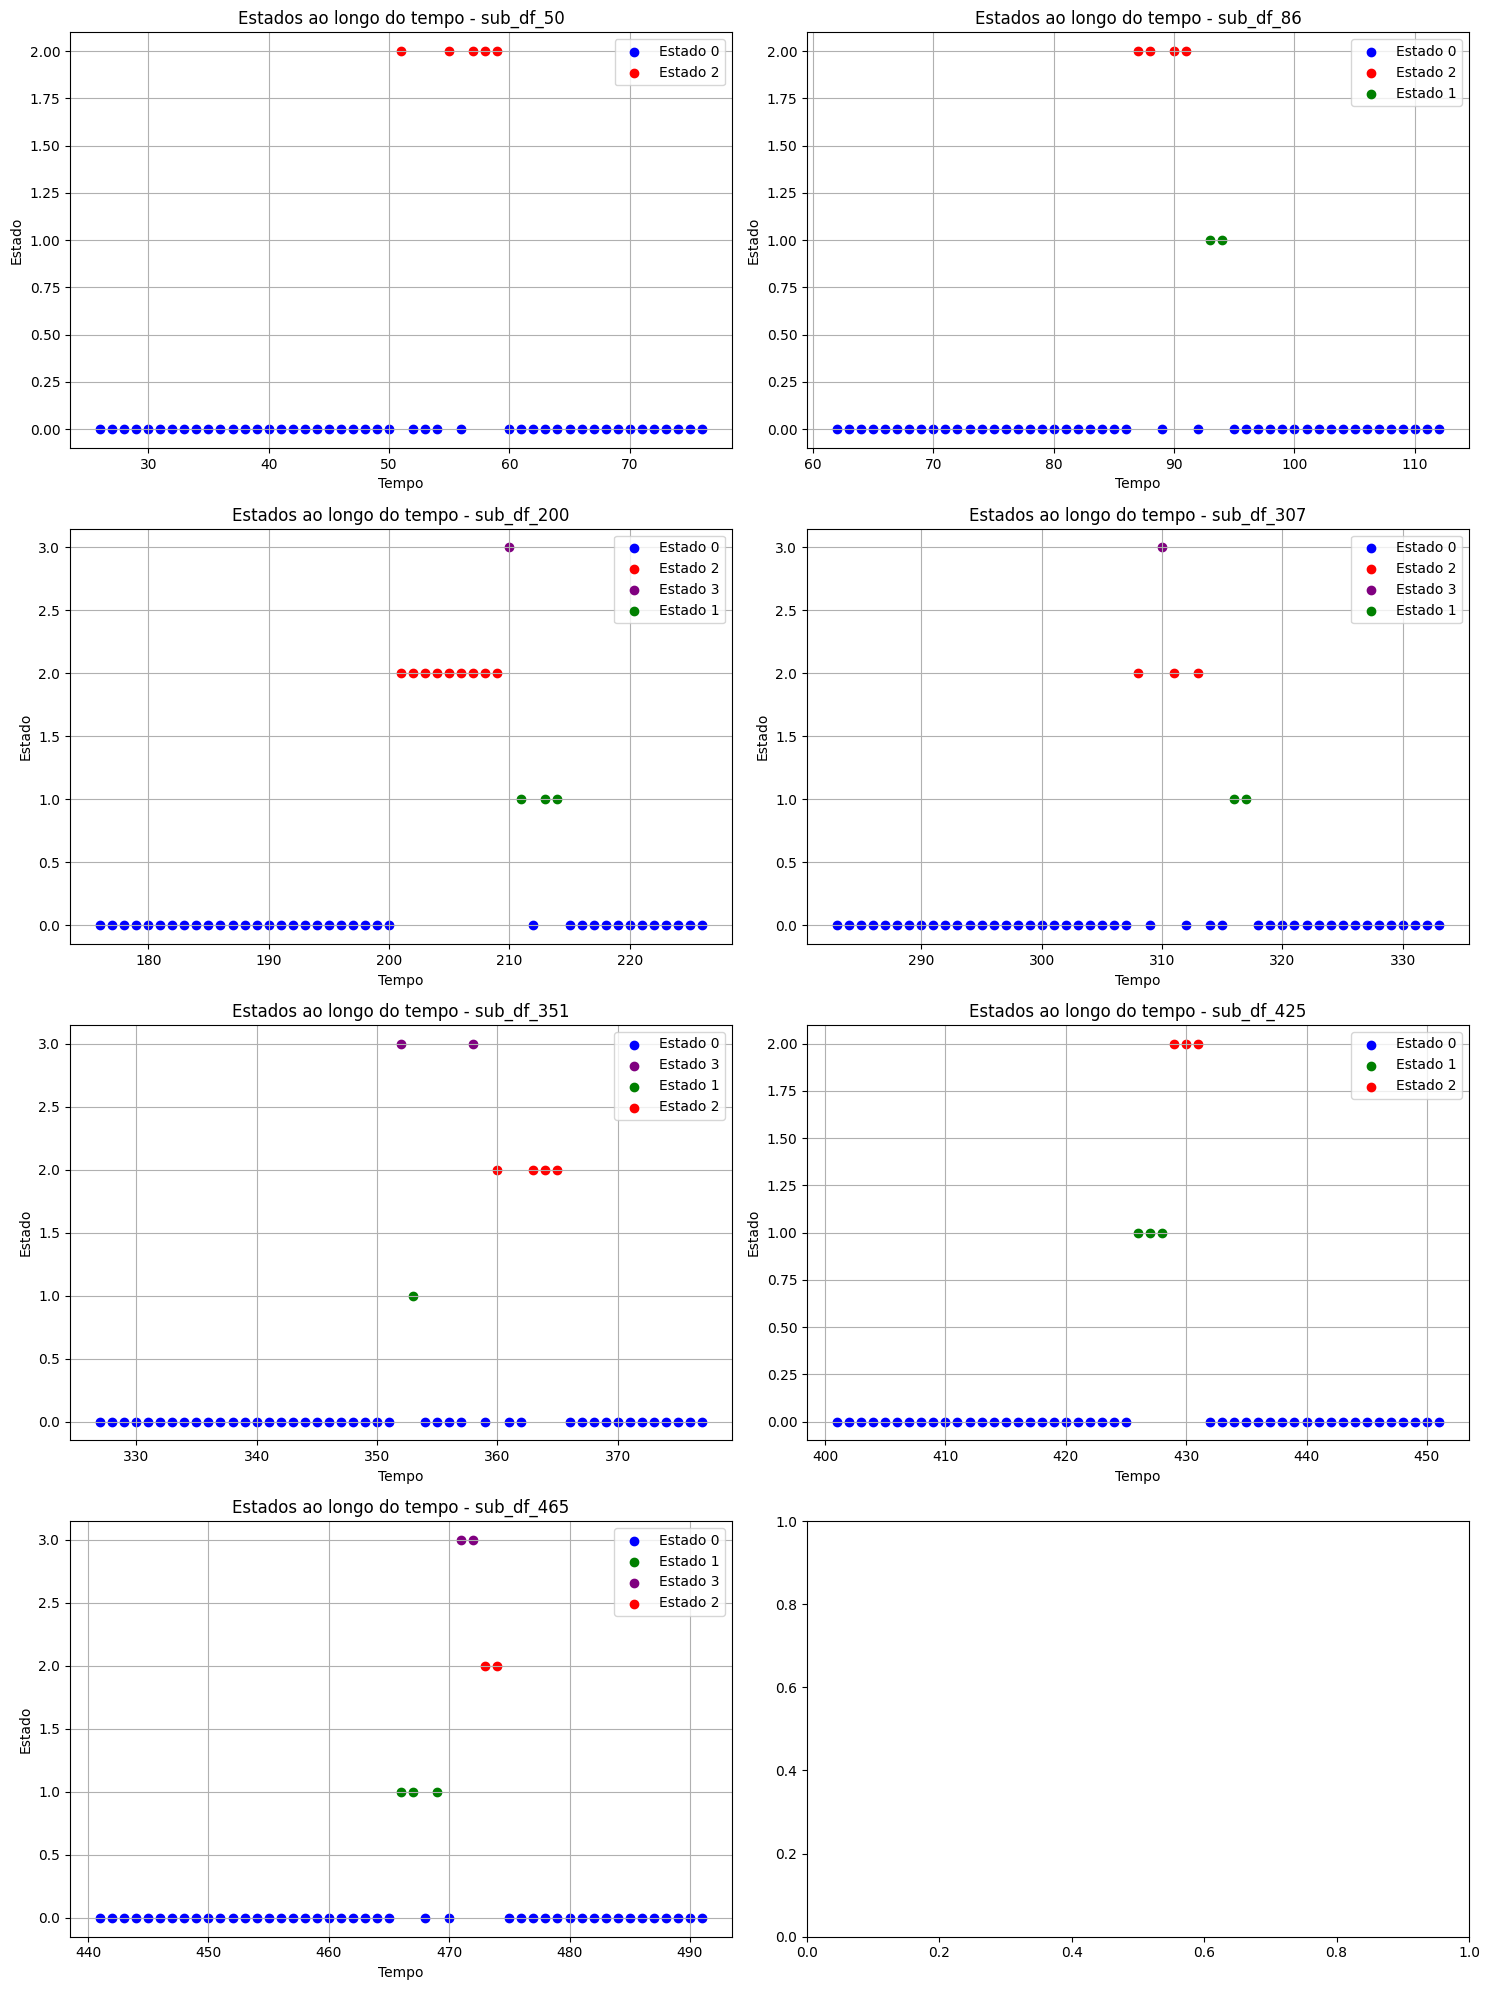

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

# Configuração do mapa de cores
color_map = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple'}

# Quantidade de DataFrames
num_dfs = len(sub_dataframes_1)
print(len(sub_dataframes_1))
cols = 2  # Número de colunas na grade de subplots
rows = (num_dfs + cols - 1) // cols  # Número de linhas calculadas para acomodar todos os DataFrames

# Criando uma figura grande para acomodar todos os subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axs = axs.flatten()  # Transforma a matriz de axs em um array linear para facilitar o acesso

# Iterando sobre cada subframe dentro do dicionário de dataframes
for idx, (key, df) in enumerate(sub_dataframes_1.items()):
    # Convertendo a coluna 'measured_at' para datetime

    # Plotando dados para cada estado único no subplot correspondente
    for state in df['state'].unique():
        subset = df[df['state'] == state]
        axs[idx].scatter(subset['id'], subset['state'], color=color_map[state], label=f'Estado {state}')

    # Formatando o eixo X para mostrar datas
    #axs[idx].xaxis.set_major_formatter(DateFormatter('%M:%S'))
    #axs[idx].figure.autofmt_xdate()  # Auto-formata as datas para evitar sobreposição

    # Adicionando título e legendas
    axs[idx].set_title(f'Estados ao longo do tempo - {key}')
    axs[idx].set_xlabel('Tempo')
    axs[idx].set_ylabel('Estado')
    axs[idx].legend()
    axs[idx].grid(True)

# Ajusta o layout para evitar sobreposição de elementos
plt.tight_layout()
plt.show()

In [98]:
#Estado da linha anterior
previous_state = 0
count = 0
#Máquina de estados
  #0 = sem excitação
  #1 = entrando
  #2 = saindo
state_machine = 0
for index, row in bin_data.iterrows():
    #Condição para iniciar a máquina de estados
    if(row['state'] == 3 and state_machine == 0):
      print("Evento de interesse:", end=" ")
      if(previous_state == 1):
        print("Alguém está entrando...", end=" ")
        state_machine = 1
      if(previous_state == 2):
        print("Alguém está saindo...", end=" ")
        state_machine = 2
    else:
    #Condição redundante para os dois estados(3,3)
    #Não precisa existir
    #if(previous_state == 3 and row['state'] == 3):
      #print("Alguém continua tentando entrar/sair...", end=" ")
      #state_machine = state_machine
    #Possíveis caminhos para o estado de entrada
      if(state_machine == 1):
        if(previous_state == 2 and row['state'] == 0):
          print("Alguém entrou")
          count = count + 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 1):
          print("A pessoa desistiu de entrar")
          state_machine = 0
        else:
          print("Alguém continua tentando entrar...", end=" ")
        #A máquina de estados nao varia
      #Possíveis caminhos para o estado de saída
      if(state_machine == 2):
        if(previous_state == 1 and row['state'] == 0):
          print("Alguém saiu")
          count = count - 1
          state_machine = 0
        elif(row['state'] == 0 or row['state'] == 2):
          print("A pessoa desistiu de sair")
          state_machine = 0
        else:
          print("Alguém continua tentando sair...", end=" ")
        #A máquina de estados nao varia
    previous_state = row['state']
print(count)  

Evento de interesse: Alguém está entrando... Alguém continua tentando entrar... Alguém continua tentando entrar... A pessoa desistiu de entrar
Evento de interesse: Alguém está saindo... Alguém continua tentando sair... Alguém saiu
Evento de interesse: Alguém está entrando... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... A pessoa desistiu de entrar
Evento de interesse: Alguém está entrando... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém continua tentando entrar... Alguém entrou
Evento de interesse: Evento de interesse: Evento de interesse: Evento de interesse: Evento de interesse: 0


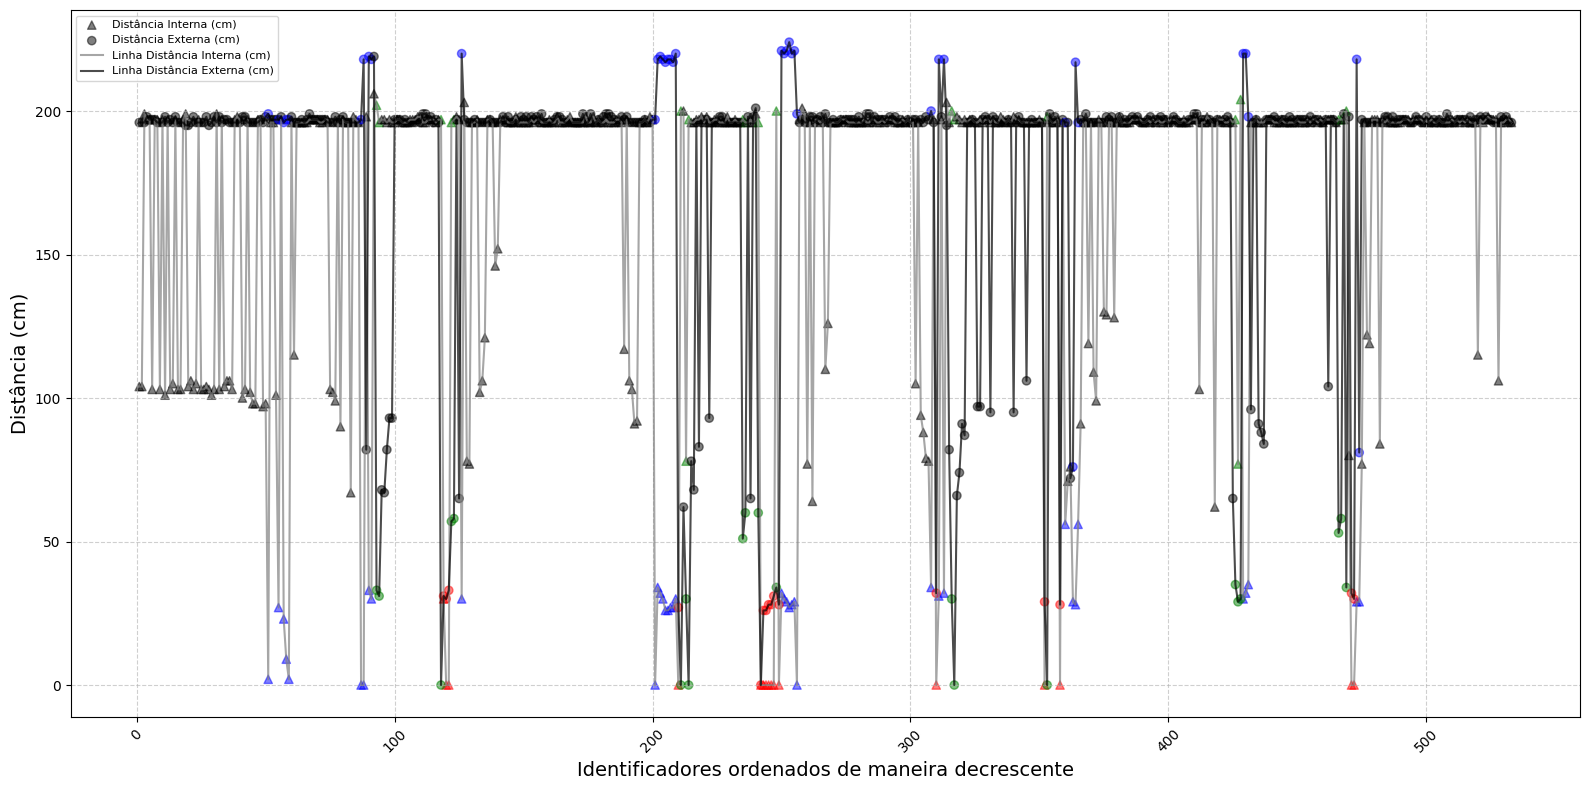

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'data' seja um DataFrame do pandas
# Exemplo de mapeamento de cores baseado no valor de 'state'
color_map = {
    0: 'black',  # state = 0 -> preto
    3: 'red',    # state = 3 -> vermelho
    2: 'blue',   # state = 2 -> azul
    1: 'green'  # state = 1 -> verde
}

# Criar uma lista de cores baseada na coluna 'state'
colors_inside = [color_map[state] for state in data['state']]
colors_outside = [color_map[state] for state in data['state']]

# Configurar o tamanho do gráfico
plt.figure(figsize=(16, 8))

# Adicionar os scatter plots com cores condicionais
plt.scatter(data['id'], data['distance_cm_inside'], label='Distância Interna (cm)', alpha=0.5, marker='^', c=colors_inside)
plt.scatter(data['id'], data['distance_cm_outside'], label='Distância Externa (cm)', alpha=0.5, c=colors_outside)

# Adicionar as linhas de conexão
plt.plot(data['id'], data['distance_cm_inside'], linestyle='-', color='gray', alpha=0.7, label='Linha Distância Interna (cm)')
plt.plot(data['id'], data['distance_cm_outside'], linestyle='-', color='black', alpha=0.7, label='Linha Distância Externa (cm)')

# Adicionar título e legendas
plt.xlabel('Identificadores ordenados de maneira decrescente', fontsize=14)
plt.ylabel('Distância (cm)', fontsize=14)
plt.legend(loc='upper left', fontsize=8)

# Adicionar grid para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar os rótulos do eixo X para evitar sobrecarga visual
plt.xticks(rotation=45, fontsize=10)  # Mostra um rótulo a cada 10 IDs

# Melhorar o layout geral
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [101]:
bin_data

,id,distance_cm_inside,distance_cm_outside,device_code,measured_at,errors,state_inside_sensor,state_outside_sensor,state
0,1,104,196,F0:08:D1:D0:7B:84,25:45,0,0,0,0
1,2,104,196,F0:08:D1:D0:7B:84,25:45,0,0,0,0
2,3,199,196,F0:08:D1:D0:7B:84,25:45,0,0,0,0
3,4,197,198,F0:08:D1:D0:7B:84,25:45,0,0,0,0
4,5,197,197,F0:08:D1:D0:7B:84,25:45,0,0,0,0
...,...,...,...,...,...,...,...,...,...
528,529,196,198,F0:08:D1:D0:7B:84,24:33,0,0,0,0
529,530,196,197,F0:08:D1:D0:7B:84,24:33,0,0,0,0
530,531,197,198,F0:08:D1:D0:7B:84,24:33,0,0,0,0
531,532,197,196,F0:08:D1:D0:7B:84,24:33,0,0,0,0
